In [2]:
## 데이터 증강X, 에포크 늘리기, 64픽셀

import os
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import PIL
from PIL import Image
import cv2

from segment import *

In [3]:
path = './64hair/'

training_images = []
training_labels = []

# Label & image
for img in glob(path + "/*.png"):
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    an_img = Image.fromarray(image)
    img_array = np.array(an_img)
    training_images.append(img_array)
    label = img.split('\\')[-1]
    training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

### 헤어 이미지 13개 라벨링(숫자)

from sklearn.preprocessing import LabelEncoder
# Label = 0 ~ 12
le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1, 1)

print(training_images.shape)
print(training_labels.shape)

(13, 64, 64, 3)
(13, 1)


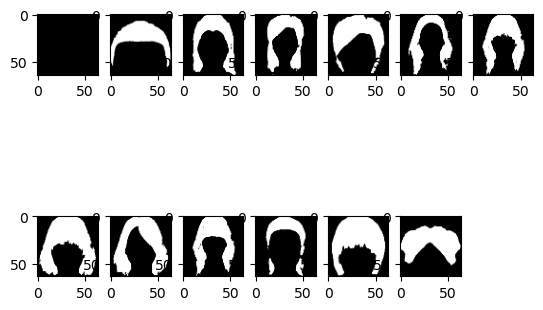

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 18개 헤어 이미지 출력
for i in range(13):
    plt.subplot(2, 7, i+1)
    plt.imshow(training_images[i])
plt.show()

In [5]:
## 라벨과 헤어 이름 맞추기
label_num = [0,1,2,3,4,5,6,7,8,9,10,11,12]
label_name = le.inverse_transform(label_num)

for i in range(13):
    print(label_num[i], label_name[i])

0 hair0.png
1 hair1.png
2 hair10.png
3 hair11.png
4 hair12.png
5 hair2.png
6 hair3.png
7 hair4.png
8 hair5.png
9 hair6.png
10 hair7.png
11 hair8.png
12 hair9.png


In [6]:
training_labels = tf.one_hot(training_labels, 13)
training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1, 13)

In [7]:
X_train = training_images
y_train = training_labels

In [8]:
X_train.shape

(13, 64, 64, 3)

In [9]:
X_train = X_train / 255.0

In [10]:
# Modeling

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *

model = Sequential()
# model.add(tf.keras.Input(shape=(128,128,3)))
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(13, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(train_x, train_labels, epochs=500, verbose=0)

In [11]:
print(X_train.shape)
print(y_train.shape)

(13, 64, 64, 3)
(13, 13)


In [12]:
data = model.fit(X_train,
                y_train,
                epochs = 1000,
                batch_size=32,)

Epoch 1/1000
1/1 [==============================] - 1s 592ms/step - loss: 2.5588 - accuracy: 0.0769
Epoch 2/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1354 - accuracy: 0.3846
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.2613 - accuracy: 0.2308
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2657 - accuracy: 0.4615
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7440 - accuracy: 0.9231
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1332 - accuracy: 0.8462
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8999 - accuracy: 0.8462
Epoch 8/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2813 - accuracy: 0.6923
Epoch 9/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9158 - accuracy: 0.8462
Epoch 10/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4379 - accuracy: 0.9231
Epoch 11

Epoch 82/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5252e-04 - accuracy: 1.0000
Epoch 83/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4196e-04 - accuracy: 1.0000
Epoch 84/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3138e-04 - accuracy: 1.0000
Epoch 85/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2163e-04 - accuracy: 1.0000
Epoch 86/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1273e-04 - accuracy: 1.0000
Epoch 87/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0385e-04 - accuracy: 1.0000
Epoch 88/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9547e-04 - accuracy: 1.0000
Epoch 89/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8786e-04 - accuracy: 1.0000
Epoch 90/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8006e-04 - accuracy: 1.0000
Epoch 91/1000
1/1 [==============================] - 0s 30ms/ste

1/1 [==============================] - 0s 30ms/step - loss: 2.6142e-05 - accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5739e-05 - accuracy: 1.0000
Epoch 162/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5326e-05 - accuracy: 1.0000
Epoch 163/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4959e-05 - accuracy: 1.0000
Epoch 164/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4556e-05 - accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4198e-05 - accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3850e-05 - accuracy: 1.0000
Epoch 167/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.3492e-05 - accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.3190e-05 - accuracy: 1.0000
Epoch 169/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 30ms/step - loss: 1.1233e-05 - accuracy: 1.0000
Epoch 239/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1141e-05 - accuracy: 1.0000
Epoch 240/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1059e-05 - accuracy: 1.0000
Epoch 241/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0976e-05 - accuracy: 1.0000
Epoch 242/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0894e-05 - accuracy: 1.0000
Epoch 243/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0820e-05 - accuracy: 1.0000
Epoch 244/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0747e-05 - accuracy: 1.0000
Epoch 245/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0674e-05 - accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0609e-05 - accuracy: 1.0000
Epoch 247/1000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 6.9782e-06 - accuracy: 1.0000
Epoch 317/1000
1/1 [==============================] - 0s 28ms/step - loss: 6.9140e-06 - accuracy: 1.0000
Epoch 318/1000
1/1 [==============================] - 0s 29ms/step - loss: 6.8865e-06 - accuracy: 1.0000
Epoch 319/1000
1/1 [==============================] - 0s 28ms/step - loss: 6.8498e-06 - accuracy: 1.0000
Epoch 320/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.8223e-06 - accuracy: 1.0000
Epoch 321/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.7948e-06 - accuracy: 1.0000
Epoch 322/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.7673e-06 - accuracy: 1.0000
Epoch 323/1000
1/1 [==============================] - 0s 29ms/step - loss: 6.7398e-06 - accuracy: 1.0000
Epoch 324/1000
1/1 [==============================] - 0s 29ms/step - loss: 6.6940e-06 - accuracy: 1.0000
Epoch 325/1000
1/1 [==============================] - 0s 30ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 4.9609e-06 - accuracy: 1.0000
Epoch 395/1000
1/1 [==============================] - 0s 30ms/step - loss: 4.9425e-06 - accuracy: 1.0000
Epoch 396/1000
1/1 [==============================] - 0s 33ms/step - loss: 4.9334e-06 - accuracy: 1.0000
Epoch 397/1000
1/1 [==============================] - 0s 37ms/step - loss: 4.9150e-06 - accuracy: 1.0000
Epoch 398/1000
1/1 [==============================] - 0s 33ms/step - loss: 4.9059e-06 - accuracy: 1.0000
Epoch 399/1000
1/1 [==============================] - 0s 29ms/step - loss: 4.8784e-06 - accuracy: 1.0000
Epoch 400/1000
1/1 [==============================] - 0s 30ms/step - loss: 4.8508e-06 - accuracy: 1.0000
Epoch 401/1000
1/1 [==============================] - 0s 28ms/step - loss: 4.8325e-06 - accuracy: 1.0000
Epoch 402/1000
1/1 [==============================] - 0s 28ms/step - loss: 4.8233e-06 - accuracy: 1.0000
Epoch 403/1000
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 3.8422e-06 - accuracy: 1.0000
Epoch 473/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.8330e-06 - accuracy: 1.0000
Epoch 474/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.8238e-06 - accuracy: 1.0000
Epoch 475/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.8147e-06 - accuracy: 1.0000
Epoch 476/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.7963e-06 - accuracy: 1.0000
Epoch 477/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.7872e-06 - accuracy: 1.0000
Epoch 478/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.7780e-06 - accuracy: 1.0000
Epoch 479/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.7688e-06 - accuracy: 1.0000
Epoch 480/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.7596e-06 - accuracy: 1.0000
Epoch 481/1000
1/1 [==============================] - 0s 36ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 3.0994e-06 - accuracy: 1.0000
Epoch 551/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.0811e-06 - accuracy: 1.0000
Epoch 552/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.0719e-06 - accuracy: 1.0000
Epoch 553/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.0627e-06 - accuracy: 1.0000
Epoch 554/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.0261e-06 - accuracy: 1.0000
Epoch 555/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.0261e-06 - accuracy: 1.0000
Epoch 556/1000
1/1 [==============================] - 0s 30ms/step - loss: 3.0261e-06 - accuracy: 1.0000
Epoch 557/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.0077e-06 - accuracy: 1.0000
Epoch 558/1000
1/1 [==============================] - 0s 30ms/step - loss: 3.0077e-06 - accuracy: 1.0000
Epoch 559/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 2.5951e-06 - accuracy: 1.0000
Epoch 629/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5859e-06 - accuracy: 1.0000
Epoch 630/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.5859e-06 - accuracy: 1.0000
Epoch 631/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.5767e-06 - accuracy: 1.0000
Epoch 632/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5767e-06 - accuracy: 1.0000
Epoch 633/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.5676e-06 - accuracy: 1.0000
Epoch 634/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.5676e-06 - accuracy: 1.0000
Epoch 635/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.5584e-06 - accuracy: 1.0000
Epoch 636/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5584e-06 - accuracy: 1.0000
Epoch 637/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 2.2283e-06 - accuracy: 1.0000
Epoch 707/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2099e-06 - accuracy: 1.0000
Epoch 708/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2099e-06 - accuracy: 1.0000
Epoch 709/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2099e-06 - accuracy: 1.0000
Epoch 710/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2099e-06 - accuracy: 1.0000
Epoch 711/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2099e-06 - accuracy: 1.0000
Epoch 712/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1916e-06 - accuracy: 1.0000
Epoch 713/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1916e-06 - accuracy: 1.0000
Epoch 714/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1916e-06 - accuracy: 1.0000
Epoch 715/1000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 30ms/step - loss: 1.9624e-06 - accuracy: 1.0000
Epoch 785/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9624e-06 - accuracy: 1.0000
Epoch 786/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9440e-06 - accuracy: 1.0000
Epoch 787/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 788/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 789/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 790/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 791/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 792/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9349e-06 - accuracy: 1.0000
Epoch 793/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 1.7239e-06 - accuracy: 1.0000
Epoch 863/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7148e-06 - accuracy: 1.0000
Epoch 864/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7148e-06 - accuracy: 1.0000
Epoch 865/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 866/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 867/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 868/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 869/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 870/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7056e-06 - accuracy: 1.0000
Epoch 871/1000
1/1 [==============================] - 0s 30ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 1.5405e-06 - accuracy: 1.0000
Epoch 941/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5405e-06 - accuracy: 1.0000
Epoch 942/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5405e-06 - accuracy: 1.0000
Epoch 943/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5405e-06 - accuracy: 1.0000
Epoch 944/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 945/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 946/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 947/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 948/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5314e-06 - accuracy: 1.0000
Epoch 949/1000
1/1 [==============================] - 0s 29ms/step - l

In [143]:
path = './test5.jpg'
test = hair_seg(path)
test_array = testimg(64, test)

In [144]:
cv2.imshow('testimg', test_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [145]:
## Test
test_image = []
test_image.append(test_array)
test_image = np.array(test_image) / 255.0

In [146]:
pred = model.predict(test_image)

pred = np.argmax(pred)
print(label_name[pred])

1/1 [==============================] - 0s 129ms/step
hair2.png


In [56]:
model.save("female_hair.h5")